In [289]:
import os
import cv2
import numpy as np
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,Input,Embedding,LSTM
from keras.callbacks import EarlyStopping
import json
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd
from keras.initializers import Constant
from PIL import Image
import random
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns

In [177]:
images,labels=[],[]

In [178]:
def get_images_labels(path,images,labels):
    b=os.listdir(path)
    for i in b:
        c=os.listdir(os.path.join(path,i))
        for j in c:
            image_path=os.path.join(path,i,j)
            img=cv2.imread(image_path)
            if img is None:
                print('Wrong Path')
            else:
                resized_img=cv2.resize(img,(80,80))
                resized_img=np.array(resized_img)
                scaled_img=resized_img/255
                images.append(scaled_img)
                labels.append(i)

In [179]:
get_images_labels('Celebrity Images',images,labels)

Wrong Path
Wrong Path
Wrong Path
Wrong Path
Wrong Path
Wrong Path
Wrong Path
Wrong Path
Wrong Path
Wrong Path
Wrong Path


In [180]:
images[0]

array([[[0.51764706, 0.67843137, 0.71372549],
        [0.51764706, 0.67843137, 0.71372549],
        [0.51764706, 0.67843137, 0.71372549],
        ...,
        [0.07843137, 0.14509804, 0.2745098 ],
        [0.08627451, 0.13333333, 0.26666667],
        [0.09019608, 0.12941176, 0.2627451 ]],

       [[0.51764706, 0.67843137, 0.71372549],
        [0.52156863, 0.68235294, 0.71764706],
        [0.5254902 , 0.68627451, 0.72156863],
        ...,
        [0.0745098 , 0.15686275, 0.28235294],
        [0.07058824, 0.1372549 , 0.26666667],
        [0.07843137, 0.1372549 , 0.26666667]],

       [[0.51764706, 0.67843137, 0.71372549],
        [0.52156863, 0.68235294, 0.71764706],
        [0.52941176, 0.69019608, 0.7254902 ],
        ...,
        [0.07843137, 0.14509804, 0.2745098 ],
        [0.09019608, 0.14117647, 0.2745098 ],
        [0.07843137, 0.1372549 , 0.26666667]],

       ...,

       [[0.11764706, 0.11764706, 0.11764706],
        [0.10588235, 0.10588235, 0.10588235],
        [0.11764706, 0

In [181]:
labels[:10]

['Johnny_Depp',
 'Johnny_Depp',
 'Johnny_Depp',
 'Johnny_Depp',
 'Johnny_Depp',
 'Johnny_Depp',
 'Johnny_Depp',
 'Johnny_Depp',
 'Johnny_Depp',
 'Johnny_Depp']

In [182]:
labels=np.array(labels)

In [183]:
print('The dataset contains',len(images),'photos')

The dataset contains 16737 photos


In [184]:
len(labels)

16737

In [185]:
images,labels=shuffle(images,labels,random_state=42)

In [186]:
def image_visualization(images_data,labels_data):
    plt.figure(figsize=(20,15))
    for i in range(0,12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(cv2.cvtColor(images_data[i].astype('float32'),cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title(labels_data[i])

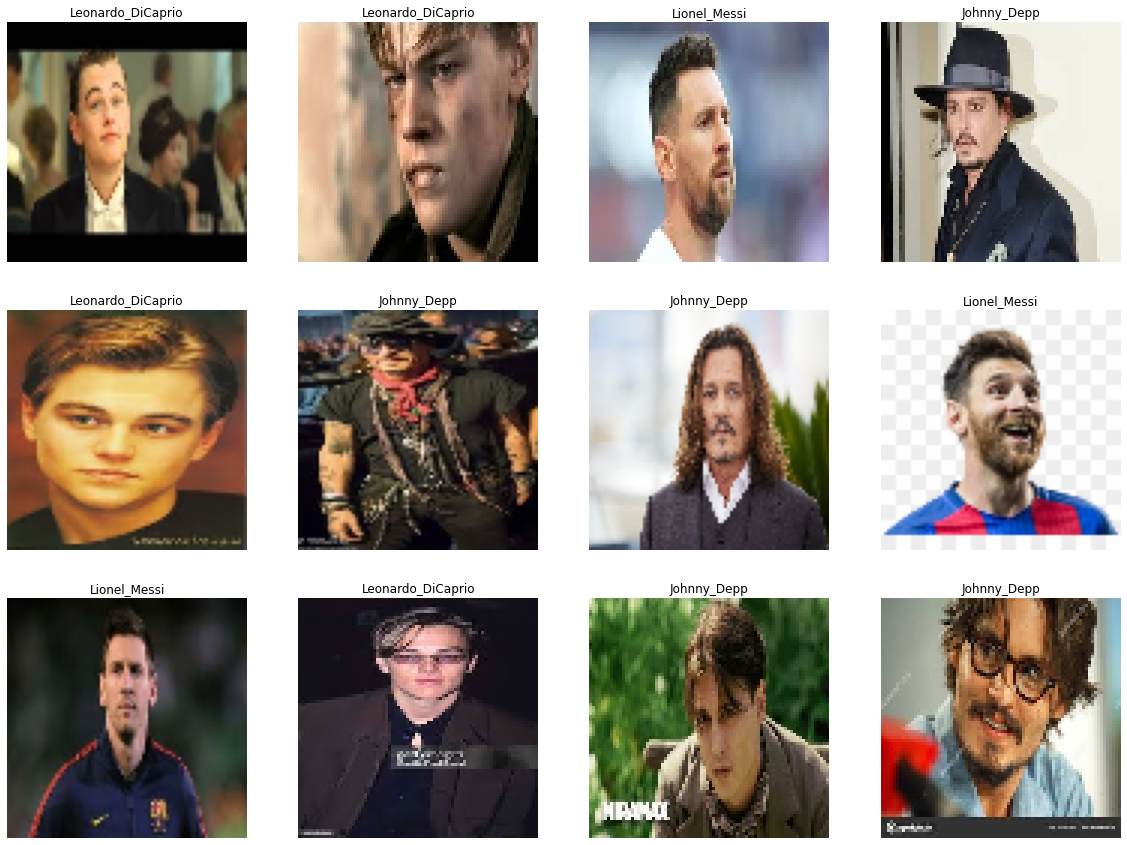

In [187]:
image_visualization(images,labels)

In [188]:
le=LabelEncoder()
labels=le.fit_transform(labels)

In [189]:
labels[:10]

array([1, 1, 2, 0, 1, 0, 0, 2, 2, 1], dtype=int64)

In [190]:
def splitting_train_test(images_data,labels_data,test_data_size):
    return train_test_split(images_data,labels_data,test_size=test_data_size,random_state=42,stratify=labels_data,shuffle=True)

In [191]:
X_train,X_test,y_train,y_test=splitting_train_test(images,labels,0.2)

In [192]:
X_train[0]

array([[[0.9254902 , 0.94117647, 0.89803922],
        [0.9254902 , 0.94117647, 0.89803922],
        [0.9254902 , 0.94117647, 0.89803922],
        ...,
        [0.75686275, 0.76862745, 0.65882353],
        [0.74117647, 0.76470588, 0.67843137],
        [0.74117647, 0.76470588, 0.69411765]],

       [[0.9254902 , 0.94117647, 0.89803922],
        [0.9254902 , 0.94117647, 0.89803922],
        [0.9254902 , 0.94117647, 0.89803922],
        ...,
        [0.74901961, 0.76078431, 0.64705882],
        [0.74509804, 0.76470588, 0.67058824],
        [0.74117647, 0.76078431, 0.68235294]],

       [[0.9254902 , 0.94117647, 0.89803922],
        [0.9254902 , 0.94117647, 0.89803922],
        [0.9254902 , 0.94117647, 0.89803922],
        ...,
        [0.72941176, 0.74509804, 0.63137255],
        [0.74901961, 0.76078431, 0.65490196],
        [0.74509804, 0.75686275, 0.66666667]],

       ...,

       [[0.23529412, 0.30980392, 0.29803922],
        [0.25882353, 0.33333333, 0.32156863],
        [0.28627451, 0

In [193]:
y_train[:10]

array([0, 0, 2, 2, 2, 0, 2, 1, 0, 1], dtype=int64)

In [194]:
X_train=np.array(X_train)

In [195]:
X_test=np.array(X_test)

In [196]:
X_train.shape

(13389, 80, 80, 3)

In [197]:
X_test.shape

(3348, 80, 80, 3)

In [198]:
def cnn_model(num_classes):
    i=Input(shape=(80,80,3))
    x=Conv2D(16,(3,3),padding='same',activation='leaky_relu')(i)
    x=MaxPooling2D(pool_size=(2,2))(x)
    x=Conv2D(16,(3,3),padding='same',activation='leaky_relu')(x)
    x=MaxPooling2D(pool_size=(2,2))(x)
    x=Dropout(0.4)(x)
    x=Flatten()(x)
    x=Dense(64,activation='leaky_relu')(x)
    x=Dropout(0.4)(x)
    x=Dense(num_classes,activation='softmax')(x)
    return Model(inputs=i,outputs=x)

In [199]:
model=cnn_model(3)

In [200]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [201]:
model.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 80, 80, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 80, 80, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 40, 40, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 40, 40, 16)          │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 20, 20, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 20, 20, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │         409,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 412,627 (1.57 MB)

 Trainable params: 412,627 (1.57 MB)

 Non-trainable params: 0 (0.00 B)

In [202]:
early_stopping=EarlyStopping(monitor='val_loss',patience=2)

In [203]:
history=model.fit(X_train,y_train,epochs=200,validation_split=0.1,callbacks=[early_stopping])

Epoch 1/200
377/377 ━━━━━━━━━━━━━━━━━━━━ 64s 86ms/step - accuracy: 0.5635 - loss: 0.8922 - val_accuracy: 0.7080 - val_loss: 0.6756
Epoch 2/200
377/377 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.7356 - loss: 0.6243 - val_accuracy: 0.7842 - val_loss: 0.5585
Epoch 3/200
377/377 ━━━━━━━━━━━━━━━━━━━━ 18s 47ms/step - accuracy: 0.7906 - loss: 0.5084 - val_accuracy: 0.8036 - val_loss: 0.5061
Epoch 4/200
377/377 ━━━━━━━━━━━━━━━━━━━━ 18s 48ms/step - accuracy: 0.8219 - loss: 0.4316 - val_accuracy: 0.8223 - val_loss: 0.4510
Epoch 5/200
377/377 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - accuracy: 0.8527 - loss: 0.3709 - val_accuracy: 0.8387 - val_loss: 0.4530
Epoch 6/200
377/377 ━━━━━━━━━━━━━━━━━━━━ 17s 46ms/step - accuracy: 0.8699 - loss: 0.3328 - val_accuracy: 0.8544 - val_loss: 0.3951
Epoch 7/200
377/377 ━━━━━━━━━━━━━━━━━━━━ 18s 47ms/step - accuracy: 0.8958 - loss: 0.2754 - val_accuracy: 0.8678 - val_loss: 0.3917
Epoch 8/200
377/377 ━━━━━━━━━━━━━━━━━━━━ 18s 46ms/step - accuracy: 0.8948 - loss: 0

In [204]:
model.evaluate(X_test,y_test)

105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8733 - loss: 0.3733


[0.34614846110343933, 0.877538800239563]

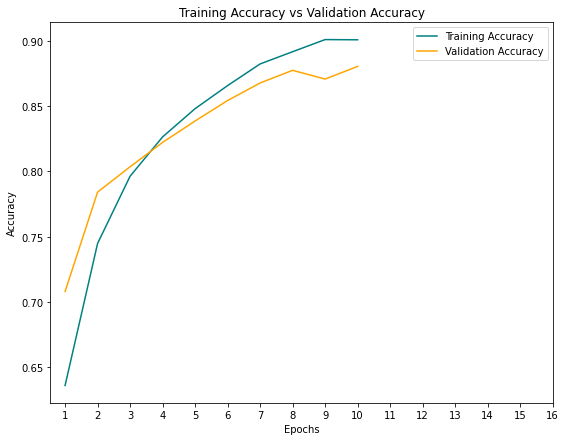

In [205]:
plt.figure(figsize=(9,7))
plt.plot(history.history['accuracy'],label='Training Accuracy',color='teal')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy',color='orange')
plt.title('Training Accuracy vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
plt.legend()
plt.show()

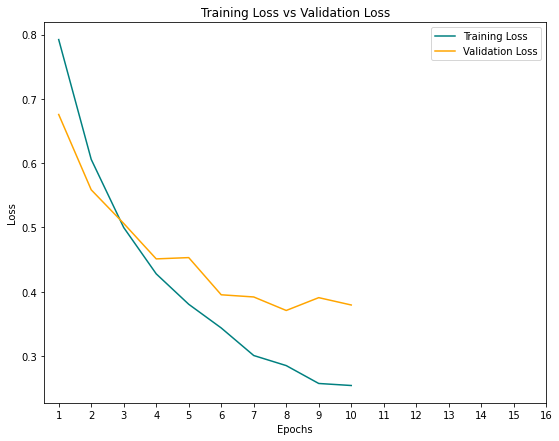

In [206]:
plt.figure(figsize=(9,7))
plt.plot(history.history['loss'],label='Training Loss',color='teal')
plt.plot(history.history['val_loss'],label='Validation Loss',color='orange')
plt.title('Training Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
plt.legend()
plt.show()

In [207]:
with open('johnny_depp.json') as f:
    data=json.load(f)

In [208]:
data['intents'][0]

{'tag': 'greetings',
 'patterns': ['hello',
  'hey',
  'hi',
  'good day',
  'Greetings',
  "what's up?",
  'how is it going'],
 'responses': ['Hello!', 'Hey!', 'What can I do for you?']}

In [209]:
def getting_data(dataset,X,y,dic):
    with open(dataset) as f:
        data=json.load(f)
    for i in data['intents']:
        for j in i['patterns']:
            X.append(j)
            y.append(i['tag'])
        dic[i['tag']]=i['responses']

In [210]:
X,y=[],[]
resp=dict()

In [211]:
getting_data('johnny_depp.json',X,y,resp)

In [212]:
X[:20]

['hello',
 'hey',
 'hi',
 'good day',
 'Greetings',
 "what's up?",
 'how is it going',
 'cya',
 'See you later',
 'Goodbye',
 'I am Leaving',
 'Have a good day',
 'bye',
 'cao',
 'see ya',
 'On what date was he born?',
 'On what date was born?',
 'when was he born?',
 'when was born?',
 'What year was he born?']

In [213]:
y[:20]

['greetings',
 'greetings',
 'greetings',
 'greetings',
 'greetings',
 'greetings',
 'greetings',
 'goodbye',
 'goodbye',
 'goodbye',
 'goodbye',
 'goodbye',
 'goodbye',
 'goodbye',
 'goodbye',
 'q1',
 'q1',
 'q1',
 'q1',
 'q1']

In [214]:
resp['greetings']

['Hello!', 'Hey!', 'What can I do for you?']

In [215]:
len(X)

215

In [216]:
len(y)

215

In [217]:
def token(data):
    tokenizer=Tokenizer()
    tokenizer.fit_on_texts(data)
    b=tokenizer.texts_to_sequences(data)
    v_s=len(tokenizer.word_index)+1
    return b,v_s,tokenizer.word_index.items()

In [218]:
seq,vocab_size,word_index=token(X)

In [219]:
seq[:10]

[[73],
 [74],
 [75],
 [64, 65],
 [76],
 [66, 77],
 [20, 5, 78, 79],
 [80],
 [67, 8, 81],
 [82]]

In [220]:
vocab_size

94

In [221]:
def pad(data):
    maxlen=max([len(i) for i in data])
    d=pad_sequences(data,maxlen=maxlen,padding='post')
    return d,maxlen

In [222]:
pad_seq,maxlen=pad(seq)

In [223]:
pad_seq

array([[73,  0,  0, ...,  0,  0,  0],
       [74,  0,  0, ...,  0,  0,  0],
       [75,  0,  0, ...,  0,  0,  0],
       ...,
       [ 7,  0,  0, ...,  0,  0,  0],
       [ 4,  5, 93, ...,  0,  0,  0],
       [72,  7,  0, ...,  0,  0,  0]])

In [224]:
maxlen

13

In [225]:
len(pad_seq)

215

In [226]:
le_nlp=LabelEncoder()
y_l=le_nlp.fit_transform(y)

In [227]:
y_l[:10]

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0], dtype=int64)

In [228]:
def getting_num_classes(data):
    g=pd.DataFrame(data=data,columns=['y'])
    h=len(g['y'].unique())
    return h

In [229]:
num_classes=getting_num_classes(y)

In [230]:
num_classes

14

In [231]:
glove_file=open('glove.6B.100d.txt',encoding='utf-8')
embedding_dictionary=dict()
for line in glove_file:
    record=line.split()
    word=record[0]
    embedding=np.asarray(record[1:],dtype='float32')
    embedding_dictionary[word]=embedding
glove_file.close()

In [232]:
def getting_embedding_vectors(vocab_size,word_index):
    embedding_vectors=np.zeros((vocab_size,100))
    for word,index in word_index:
        vector=embedding_dictionary.get(word)
        if vector is not None:
            embedding_vectors[index]=vector
    return embedding_vectors

In [233]:
embedding_matrix=getting_embedding_vectors(vocab_size,word_index)

In [234]:
embedding_matrix[1]

array([ 1.28830001e-01, -8.22090030e-01,  2.74379998e-01, -6.90139979e-02,
        1.79890007e-01,  7.26050019e-01, -1.51120007e-01,  8.55410006e-03,
       -9.51219976e-01,  7.72430003e-01, -2.83749998e-01,  2.83289999e-01,
        1.48249999e-01, -1.22300005e-02, -1.92670003e-02, -3.44600007e-02,
        3.15059990e-01, -1.66390002e-01, -1.34349996e-02, -2.04590010e-03,
        6.49050027e-02, -2.09889993e-01,  1.25239998e-01,  3.52299988e-01,
        6.40399992e-01,  5.95699996e-02, -8.03020000e-01, -8.16479981e-01,
        6.61339998e-01,  5.99699989e-02, -6.15210012e-02,  8.49219978e-01,
       -2.87330002e-02,  2.76699990e-01, -1.00680006e+00,  7.17580020e-01,
       -3.72570008e-01,  4.30640012e-01, -4.92439985e-01,  3.86830002e-01,
       -3.68279994e-01,  2.79820003e-02,  1.53460002e+00, -6.05329990e-01,
       -3.44489992e-01, -1.70690000e-01,  2.92879999e-01, -5.35809994e-01,
        5.60350001e-01, -6.30129993e-01, -1.23080000e-01,  9.36330035e-02,
        5.93360007e-01,  

In [235]:
def nlp_model(num_classes,maxlen,vocab_size,embedding_matrix):
    i=Input(shape=(maxlen,))
    x=Embedding(vocab_size,100,embeddings_initializer=Constant(embedding_matrix),trainable=False)(i)
    x=LSTM(10)(x)
    x=Dense(num_classes,activation='softmax')(x)
    return Model(inputs=i,outputs=x)

In [236]:
Johnny_Depp=nlp_model(num_classes,maxlen,vocab_size,embedding_matrix)

In [237]:
Johnny_Depp.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [238]:
Johnny_Depp.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 13)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_3 (Embedding)              │ (None, 13, 100)             │           9,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 10)                  │           4,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 14)                  │             154 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,994 (54.66 KB)

 Trainable params: 13,994 (54.66 KB)

 Non-trainable params: 0 (0.00 B)

In [239]:
history_nlp=Johnny_Depp.fit(pad_seq,y_l,epochs=120)

Epoch 1/120
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.0604 - loss: 2.6345
Epoch 2/120
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1154 - loss: 2.6079 
Epoch 3/120
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1419 - loss: 2.5895 
Epoch 4/120
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2244 - loss: 2.5641
Epoch 5/120
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2420 - loss: 2.5555
Epoch 6/120
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3102 - loss: 2.5079
Epoch 7/120
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2878 - loss: 2.4882 
Epoch 8/120
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2768 - loss: 2.4636
Epoch 9/120
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3258 - loss: 2.4097 
Epoch 10/120
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3301 - loss: 2.3642
Epoch 11/120
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3545 - loss: 2.2700
Epoch 12/120
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3553 - los

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.3803
Epoch 70/120
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 0.3811
Epoch 71/120
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.3734 
Epoch 72/120
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.3610 
Epoch 73/120
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9893 - loss: 0.3517 
Epoch 74/120
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.3417 
Epoch 75/120
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.3378
Epoch 76/120
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9964 - loss: 0.3401
Epoch 77/120
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9932 - loss: 0.3228
Epoch 78/120
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9982 - loss: 0.3173
Epoch 79/120
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9893 - loss: 0.3254
Epoch 80/120
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.

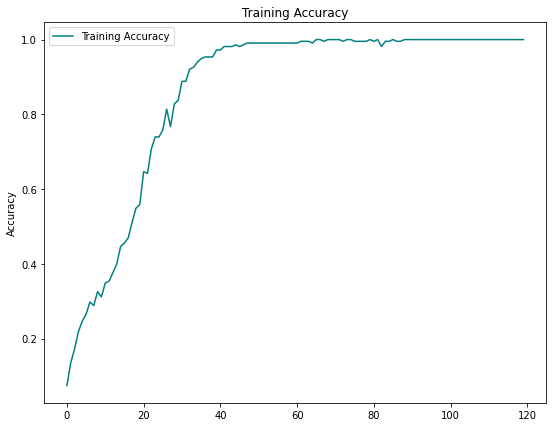

In [240]:
plt.figure(figsize=(9,7))
plt.plot(history_nlp.history['accuracy'],label='Training Accuracy',color='teal')
plt.title('Training Accuracy')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

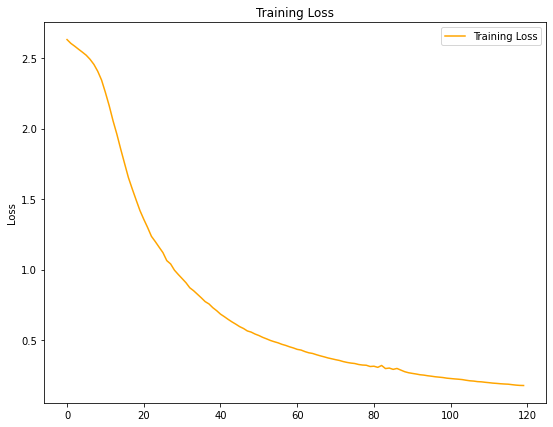

In [241]:
plt.figure(figsize=(9,7))
plt.plot(history_nlp.history['loss'],label='Training Loss',color='orange')
plt.title('Training Loss')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [242]:
X_2,y_2=[],[]
resp_2=dict()

In [243]:
getting_data('leonardo_dicaprio.json',X_2,y_2,resp_2)

In [244]:
seq2,vocab_size2,word_index2=token(X_2)

In [245]:
pad_seq2,maxlen2=pad(seq2)

In [246]:
le_nlp2=LabelEncoder()
y_l2=le_nlp2.fit_transform(y_2)

In [247]:
num_classes2=getting_num_classes(y_2)

In [248]:
embedding_matrix2=getting_embedding_vectors(vocab_size2,word_index2)

In [249]:
Leonardo_DiCaprio=nlp_model(num_classes2,maxlen2,vocab_size2,embedding_matrix2)

In [250]:
Leonardo_DiCaprio.compile(optimizer='adam',
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'])

In [251]:
Leonardo_DiCaprio.summary()

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 13)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_4 (Embedding)              │ (None, 13, 100)             │           9,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 10)                  │           4,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 14)                  │             154 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,994 (54.66 KB)

 Trainable params: 13,994 (54.66 KB)

 Non-trainable params: 0 (0.00 B)

In [252]:
history_nlp2=Leonardo_DiCaprio.fit(pad_seq2,y_l2,epochs=120)

Epoch 1/120
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.0426 - loss: 2.6426
Epoch 2/120
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1272 - loss: 2.6131 
Epoch 3/120
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1809 - loss: 2.5953
Epoch 4/120
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1826 - loss: 2.5665
Epoch 5/120
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1836 - loss: 2.5397 
Epoch 6/120
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1950 - loss: 2.5105
Epoch 7/120
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1994 - loss: 2.4781
Epoch 8/120
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2868 - loss: 2.4581
Epoch 9/120
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3216 - loss: 2.3994 
Epoch 10/120
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3230 - loss: 2.3785
Epoch 11/120
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3375 - loss: 2.2600
Epoch 12/120
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4212 - los

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9927 - loss: 0.3120
Epoch 70/120
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9756 - loss: 0.3537
Epoch 71/120
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9897 - loss: 0.3186
Epoch 72/120
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9847 - loss: 0.3123
Epoch 73/120
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9756 - loss: 0.3013
Epoch 74/120
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9944 - loss: 0.2783
Epoch 75/120
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9878 - loss: 0.2827 
Epoch 76/120
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9899 - loss: 0.2820
Epoch 77/120
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9845 - loss: 0.2915
Epoch 78/120
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9869 - loss: 0.2828
Epoch 79/120
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9821 - loss: 0.2688 
Epoch 80/120
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9928 - loss: 

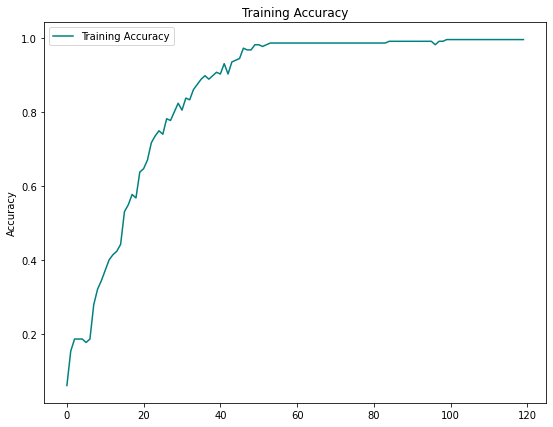

In [253]:
plt.figure(figsize=(9,7))
plt.plot(history_nlp2.history['accuracy'],label='Training Accuracy',color='teal')
plt.title('Training Accuracy')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

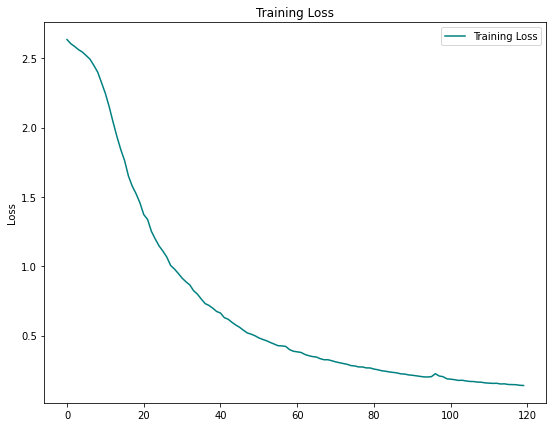

In [254]:
plt.figure(figsize=(9,7))
plt.plot(history_nlp2.history['loss'],label='Training Loss',color='teal')
plt.title('Training Loss')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [255]:
X_3,y_3=[],[]
resp_3=dict()

In [256]:
getting_data('messi.json',X_3,y_3,resp_3)

In [257]:
seq3,vocab_size3,word_index3=token(X_3)

In [258]:
pad_seq3,maxlen3=pad(seq3)

In [259]:
le_nlp3=LabelEncoder()
y_l3=le_nlp3.fit_transform(y_3)

In [260]:
num_classes3=getting_num_classes(y_3)

In [261]:
embedding_matrix3=getting_embedding_vectors(vocab_size3,word_index3)

In [262]:
Lionel_Messi=nlp_model(num_classes3,maxlen3,vocab_size3,embedding_matrix3)

In [263]:
Lionel_Messi.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

In [264]:
Lionel_Messi.summary()

Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None, 13)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_5 (Embedding)              │ (None, 13, 100)             │           9,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 10)                  │           4,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 14)                  │             154 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,194 (55.45 KB)

 Trainable params: 14,194 (55.45 KB)

 Non-trainable params: 0 (0.00 B)

In [265]:
history_nlp3=Lionel_Messi.fit(pad_seq3,y_l3,epochs=120)

Epoch 1/120
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.0547 - loss: 2.6469
Epoch 2/120
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.1644 - loss: 2.5822
Epoch 3/120
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.1761 - loss: 2.5232
Epoch 4/120
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.1856 - loss: 2.5038
Epoch 5/120
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1734 - loss: 2.4947
Epoch 6/120
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2134 - loss: 2.4289
Epoch 7/120
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2084 - loss: 2.3939
Epoch 8/120
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2129 - loss: 2.3927 
Epoch 9/120
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.1654 - loss: 2.3707
Epoch 10/120
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2268 - loss: 2.2641
Epoch 11/120
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2342 - loss: 2.2346
Epoch 12/120
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2657 - loss: 2

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.2268
Epoch 71/120
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.2289
Epoch 72/120
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.2288
Epoch 73/120
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.2251
Epoch 74/120
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.2325
Epoch 75/120
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9878 - loss: 0.2735
Epoch 76/120
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9748 - loss: 0.2618
Epoch 77/120
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9859 - loss: 0.2418
Epoch 78/120
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9970 - loss: 0.2318
Epoch 79/120
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.2176 
Epoch 80/120
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9901 - loss: 0.2136
Epoch 81/120
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.2013


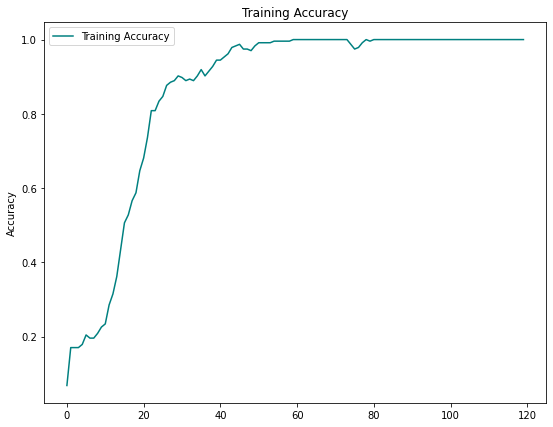

In [266]:
plt.figure(figsize=(9,7))
plt.plot(history_nlp3.history['accuracy'],label='Training Accuracy',color='teal')
plt.title('Training Accuracy')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

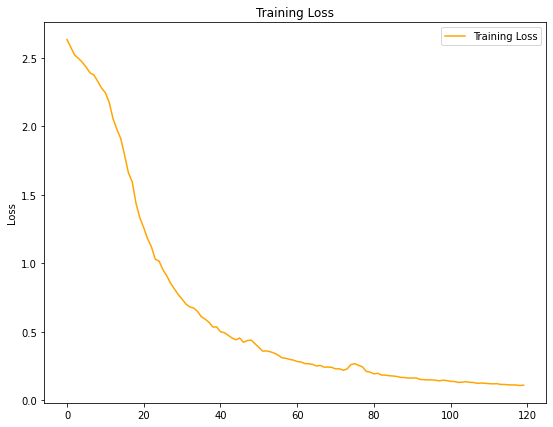

In [267]:
plt.figure(figsize=(9,7))
plt.plot(history_nlp3.history['loss'],label='Training Loss',color='orange')
plt.title('Training Loss')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [268]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(X)

Image path: dicaprio.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


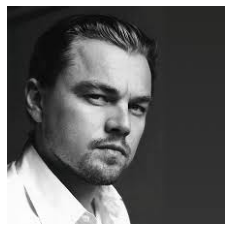

You: who is he?
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
AliTech: His name is Leonardo Wilhelm DiCaprio.
You: when was he born?
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
AliTech: November 11, 1974.
You: tell me his age
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
AliTech: He is currently 49 years old (in 2024).
You: where is his birthplace?
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
AliTech: Los Angeles, California, U.S.
You: please tell me what his job is?
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
AliTech: He is an actor and film producer.
You: tell about his wife
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
AliTech: He is not married yet.
You: How many children does he have?
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
AliTech: He has no children.
You: what movies he has acted in?
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
AliTech: He has acted in Citters 3, Poison Ive, This Boy's Life, What's Eating Gilbert Grape, The Basketball Diaries, The Quick and the Dead, Total Eclipse, Romeo + Juliet, Marvin's Room, Titanic, The Man 

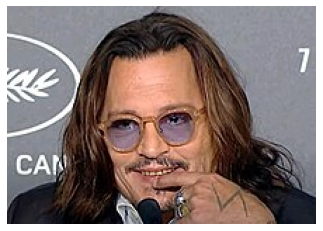

You: hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
AliTech: What can I do for you?
You: who is the person in the picture?
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
AliTech: His name is John Christopher Depp II.
You: please give me his date of birth
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
AliTech: June 9, 1963.
You: how old is he?
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
AliTech: He is currently 61 years old (in 2024).
You: where was he born?
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
AliTech: He was born in Owensboro, Kentucky, U.S.
You: does he have a job?
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
AliTech: He is an actor, musician and film producer.
You: what are the names of his wives?
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
AliTech: The names of his wives are Lory Allison (1985-1983), Amber Heard (2017-2015).
You: Does he have any children?
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
AliTech: He has two children, Lily-Rose and Jack.
You: Name the movies in which he acted.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


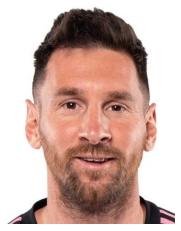

You: who is he?
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
AliTech: His name is Lionel Andres Messi.
You: could you describe his life?
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
AliTech: Lionel Andres Messi is an Argentine professional footballer who plays as a forward for and captains both Major League Soccer club Inter Miami and the Argentina national team. Widely regarded as one of the greatest players of all time, Messi has won a record eight Ballon d'Or awards, a record six European Golden Shoes, and was named the world's best player for a record eight times by FIFA.[note 2] Until 2021, he had spent his entire professional career with Barcelona, where he won a club-record 34 trophies, including ten La Liga titles, seven Copa del Rey titles, and the UEFA Champions League four times. With his country, he won the 2021 Copa America and the 2022 FIFA World Cup. Messi was born on 24 June 1987 in Rosario, Santa Fe, the third of four children of Jorge Messi, a steel factory manager, and his wife Ce

In [284]:
while True:
    path=input('Image path: ')
    if path=='finish':
        break
    image=Image.open(path)
    img=image
    image=image.resize((80,80))
    image=np.reshape(image,[1,80,80,3])
    pred=le.inverse_transform([np.argmax(model.predict(image))])[0]
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    v=pred
    while True:
        text_p=[]
        text=input('You: ')
        text_p.append(text)
        text=tokenizer.texts_to_sequences(text_p)
        text=np.array(text).reshape(-1)
        text=pad_sequences([text],maxlen=maxlen,padding='post')
        if v=='Johnny_Depp':
            output=Johnny_Depp.predict(text)
            output=output.argmax()
            response_tag=le_nlp.inverse_transform([output])[0]
            print('AliTech:',random.choice(resp[response_tag]))
            if response_tag=='goodbye':
                break
        elif v=='Leonardo_DiCaprio':
            output=Leonardo_DiCaprio.predict(text)
            output=output.argmax()
            response_tag=le_nlp2.inverse_transform([output])[0]
            print('AliTech:',random.choice(resp_2[response_tag]))
            if response_tag=='goodbye':
                break
        elif v=='Lionel_Messi':
            output=Lionel_Messi.predict(text)
            output=output.argmax()
            response_tag=le_nlp3.inverse_transform([output])[0]
            print('AliTech:',random.choice(resp_3[response_tag]))
            if response_tag=='goodbye':
                break

In [288]:
y_predicted=model.predict(X_test)
y_predicted_n=[np.argmax(i) for i in y_predicted]

105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step


In [290]:
print(classification_report(y_test,y_predicted_n))

              precision    recall  f1-score   support

           0       0.87      0.80      0.83      1103
           1       0.83      0.89      0.86      1123
           2       0.94      0.94      0.94      1122

    accuracy                           0.88      3348
   macro avg       0.88      0.88      0.88      3348
weighted avg       0.88      0.88      0.88      3348



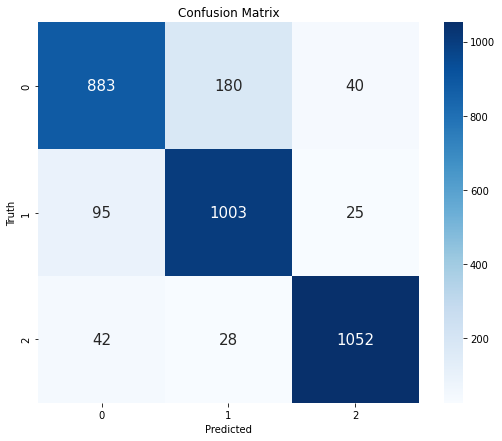

In [292]:
plt.figure(figsize=(9,7))
sns.heatmap(confusion_matrix(y_test,y_predicted_n),annot=True,square=True,cbar=True,fmt='d',annot_kws={'size':15},cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()